In [2]:
#first i have imported numpy and matplotlib libraries and created a variable that has the path of weather data file
import numpy as np
import matplotlib.pyplot as plt
file_path = 'weather.csv'

In [60]:
#DATA EXPLORATION AND CLEANING
#here i have created a data variable that reads all the data included in weather.csv file.
#for that i have used np.genfromtxt that is a powerful function in the NumPy library used to read data from text files into a NumPy array.

data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
print("Weather data:",data)

#lets see the shape of the data
print(" \n Shape of weather data:",data.shape)

#lets see the values inside data
print(data[0,0])
print(data[0,1])
print(data[0,5])


Weather data: [[ 8.  24.3  0.  ...  nan  3.6  nan]
 [14.  26.9  3.6 ...  nan  3.6  nan]
 [13.7 23.4  3.6 ...  nan 39.8  nan]
 ...
 [12.5 19.9  0.  ...  nan  0.   nan]
 [12.5 26.9  0.  ...  nan  0.   nan]
 [12.3 30.2  0.  ...  nan  0.   nan]]
 
 Shape of weather data: (366, 22)
8.0
24.3
nan


In [47]:
#Data Cleaning
#here i have changed the nan values to zero by using nan_to_num function of numpy
modified_data = np.nan_to_num(data, nan=0)
#example
print(modified_data[2])


[  13.7   23.4    3.6    5.8    3.3    0.    85.     0.     0.     6.
    6.    82.    69.  1009.5 1007.2    8.     7.    15.4   20.2    0.
   39.8    0. ]


In [49]:
#STATISTICAL ANALYSIS
#lets extract relevant columns by slicing method
min_temp = modified_data[:,0]
max_temp = modified_data[:,1]
rainfall = modified_data[:,2]
evaporation = modified_data[:,3]
sunshine = modified_data[:,4]

#lets calculate statistical quantities
min_temp_stats = {
    'min': np.min(min_temp),
    'max': np.max(min_temp),
    'mean': np.mean(min_temp),
    'median': np.median(min_temp),
    'std': np.std(min_temp)
}
print("Minimum Temperature Statistical Quantities: ", min_temp_stats)

max_temp_stats = {
    'min': np.min(max_temp),
    'max': np.max(max_temp),
    'mean': np.mean(max_temp),
    'median': np.median(max_temp),
    'std': np.std(max_temp)
}
print("Maximum Temperature Statistical Quantities: ", max_temp_stats)

rainfall_stats = {
    'min': np.min(rainfall),
    'max': np.max(rainfall),
    'mean': np.mean(rainfall),
    'median': np.median(rainfall),
    'std': np.std(rainfall)
}
print("Rainfall Statistical Quantities: ", rainfall_stats)

evaporation_stats = {
    'min': np.min(evaporation),
    'max': np.max(evaporation),
    'mean': np.mean(evaporation),
    'median': np.median(evaporation),
    'std': np.std(evaporation)
}
print("Evaporation Statistical Quantities: ", evaporation_stats)

sunshine_stats = {
    'min': np.min(sunshine),
    'max': np.max(sunshine),
    'mean': np.mean(sunshine),
    'median': np.median(sunshine),
    'std': np.std(sunshine)
}
print("Sunshine Statistical Quantities: ", sunshine_stats)


Minimum Temperature Statistical Quantities:  {'min': -5.3, 'max': 20.9, 'mean': 7.265573770491804, 'median': 7.45, 'std': 6.017562236643699}
Maximum Temperature Statistical Quantities:  {'min': 7.6, 'max': 35.8, 'mean': 20.550273224043714, 'median': 19.65, 'std': 6.6813693691233755}
Rainfall Statistical Quantities:  {'min': 0.0, 'max': 39.8, 'mean': 1.428415300546448, 'median': 0.0, 'std': 4.220022686881989}
Evaporation Statistical Quantities:  {'min': 0.2, 'max': 13.8, 'mean': 4.521857923497268, 'median': 4.2, 'std': 2.6657333424478735}
Sunshine Statistical Quantities:  {'min': 0.0, 'max': 13.6, 'mean': 7.844535519125684, 'median': 8.6, 'std': 3.5351181456046414}


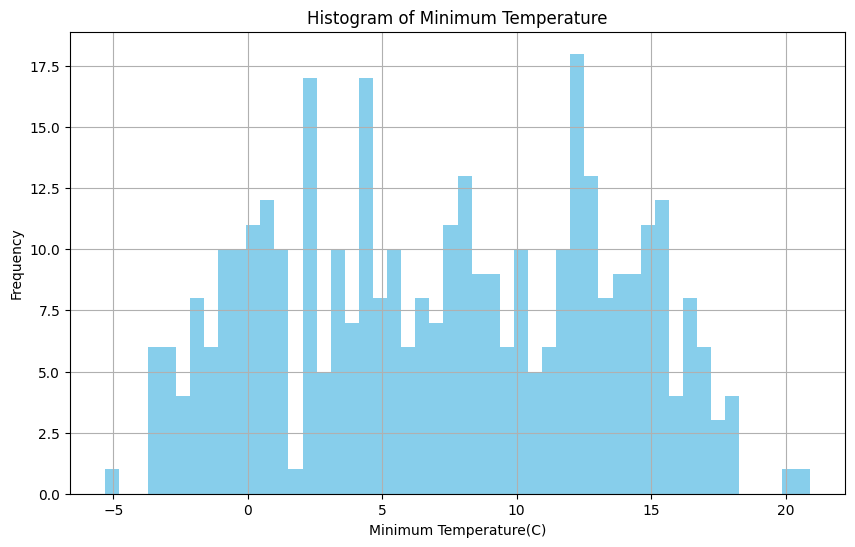

In [6]:
#DATA VISUALIZATION
#Plot for minimum temperature
plt.figure(figsize=(10,6))
plt.hist(min_temp, bins=50, color='skyblue')
plt.title('Histogram of Minimum Temperature')
plt.xlabel('Minimum Temperature(C)')
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

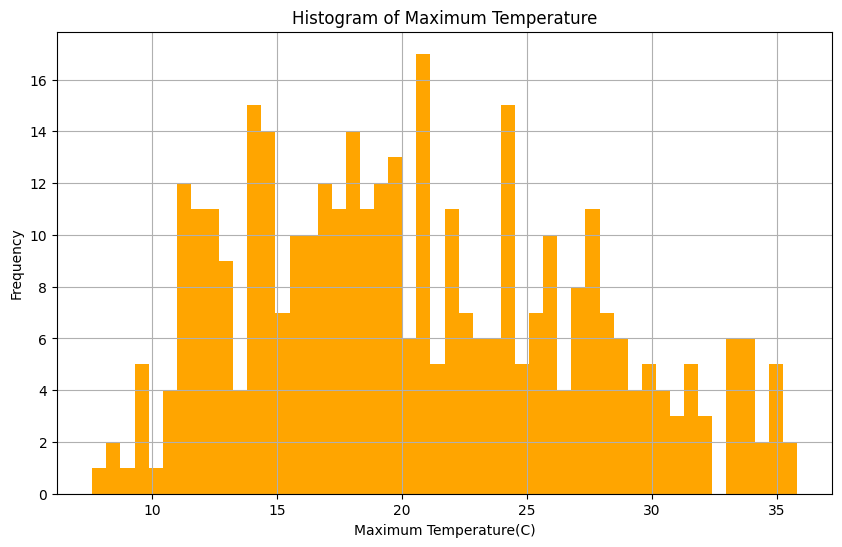

In [7]:
#Plot for maximum temperature
plt.figure(figsize=(10,6))
plt.hist(max_temp, bins=50, color='orange')
plt.title('Histogram of Maximum Temperature')
plt.xlabel('Maximum Temperature(C)')
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

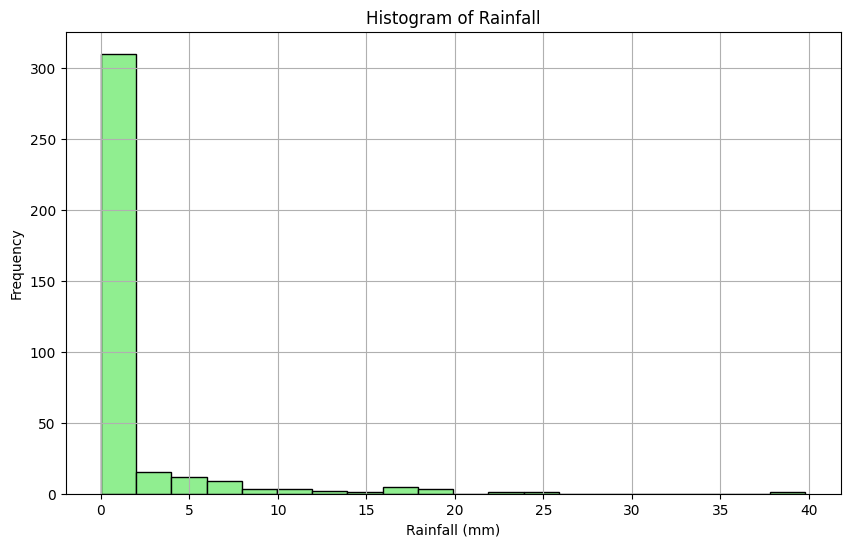

In [8]:
#Plot for rainfall
plt.figure(figsize=(10, 6))
plt.hist(rainfall, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

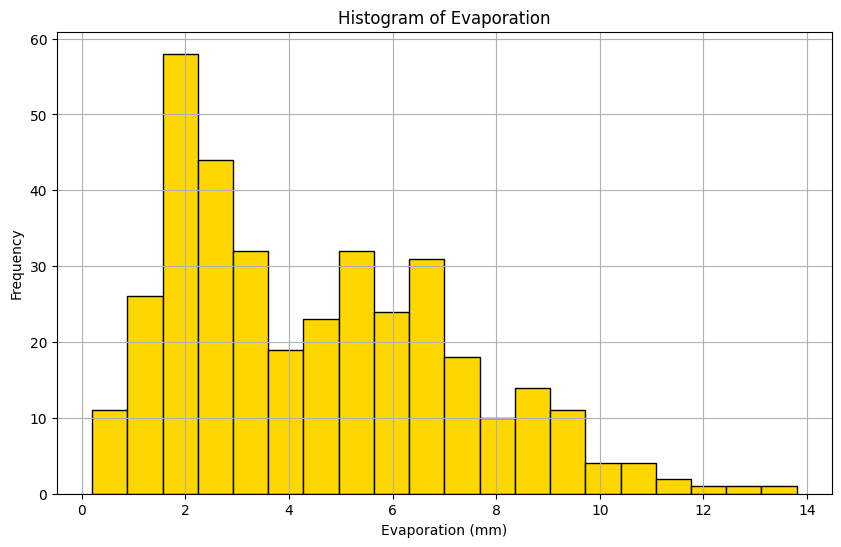

In [9]:
# Plot for evaporation
plt.figure(figsize=(10, 6))
plt.hist(evaporation, bins=20, color='gold', edgecolor='black')
plt.title('Histogram of Evaporation')
plt.xlabel('Evaporation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()